In [2]:
# %load_ext line_profiler

%load_ext autoreload
%autoreload 2

import numpy as np
import stitching
import spimage
import sphomography
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
establishing = spimage.Image.from_file('conc/2016-04-05 11.07.33.jpg')
closes = map(spimage.Image.from_file, [
    'conc/2016-04-05 11.07.44.jpg',
    'conc/2016-04-05 11.07.50.jpg',
    'conc/2016-04-05 11.07.56.jpg',
    'conc/2016-04-05 11.08.01.jpg'
])

job = stitching.StitchingJob(establishing, closes)

job.find_homographies(downsample_scale=0.5)
job.find_voronoi()

# job.detail_transfer_stitch_pt_1(canvas_scale=2, detail_transfer_radius=33, edge_blend_radius=5)

find_homographies
11.2401490211 seconds
find_voronoi
0.000561952590942 seconds


In [4]:
job.detail_transfer_stitch_pt_1(canvas_scale=2, detail_transfer_radius=33, edge_blend_radius=5)

stitching.py:24: RuntimeWarning: invalid value encountered in divide
  else mask_blurred.array[:, :, np.newaxis]
stitching.py:24: RuntimeWarning: divide by zero encountered in divide
  else mask_blurred.array[:, :, np.newaxis]


detail_transfer_stitch_pt_1
processed
processed
processed
processed
all details are transferred
13.3177978992 seconds


In [38]:
job.detail_transfer_stitch_pt_2(canvas_scale=2, detail_transfer_radius=33, edge_blend_radius=5)

detail_transfer_stitch_pt_2
22.5958399773 seconds


<Image (8064 x 6048) /Users/joshuah/Dropbox/whiteboard-stitch/conc/2016-04-05 11.07.33.jpg>

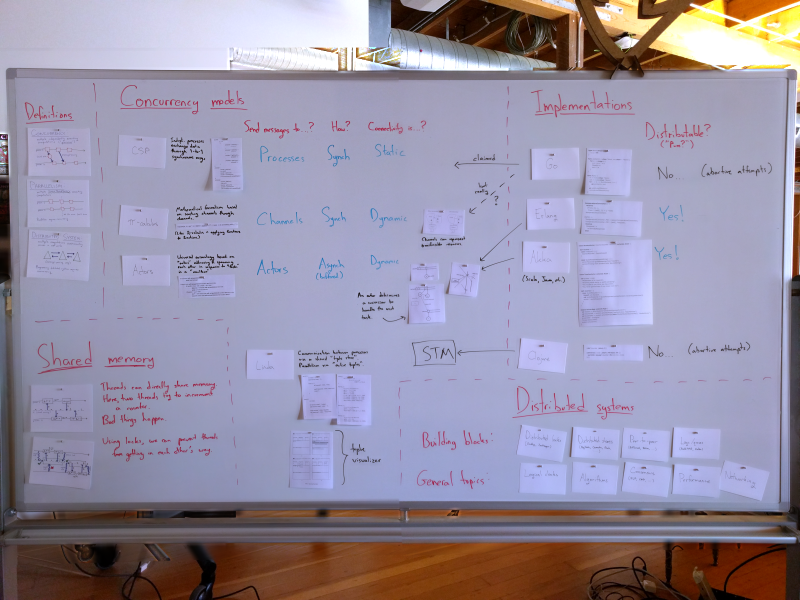

2016-04-08T12_03_36.843202.png

In [39]:
Out[38].show()

In [ ]:

(np.array([8064, 5717]) <= (8064, 6048)).all()

In [ ]:
# a, b = sphomography.apply_homography(job.closes[0], job.c_homs[0], job.establishing.system, job.establishing.dims)
# a.show()
# b.show()

In [ ]:
a, b = sphomography.apply_homography_tight(job.closes[0], job.c_homs[0], job.establishing.system, job.establishing.dims)
a.show()
b.show()

In [ ]:
spimage.operate(lambda a, b: a/2 + b/2, establishing.crop_like(a.system, a.dims), a).show()

In [ ]:
def crop_like(self, other_system, other_dims):
    other_to_me = self.system.matrix_inv.dot(other_system.matrix)
    return other_to_me

In [ ]:
other_to_me = crop_like(establishing, a.system, a.dims)

In [ ]:
import numpy as np
(other_to_me[:3, :2] == np.array([[1, 0], [0, 1], [0, 0]])).all()

In [ ]:
other_to_me[:2, 2]

In [ ]:
np.array([2,2]) > 0

In [ ]:
a.cro